In [1]:
# !pip install pandas-profiling
# !pip install imbalanced-learn
# !pip install ipywidgets
# !pip install mlxtend
#!pip install xgboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
from ydata_profiling import ProfileReport

In [5]:
from imblearn.over_sampling import RandomOverSampler

In [6]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [7]:
data = pd.read_csv("lung_cancer.csv")

In [8]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [9]:
profile = ProfileReport(data, title = "Profile Report - Risk For Lung Cancer")

In [10]:
profile.to_file(output_file = "Lung_cancer.html")

/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# Find and display all duplicate rows
data[data.duplicated(keep=False)]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
13,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
23,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
51,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
75,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES
311,M,22,1,1,1,1,1,1,1,1,1,1,1,1,1,NO
325,M,21,1,1,1,2,1,1,1,1,1,1,1,1,1,NO
329,M,21,1,1,1,2,1,1,1,1,1,1,1,1,1,NO


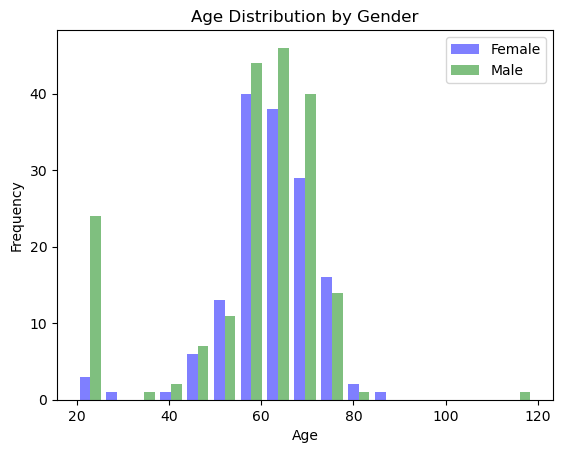

In [12]:
# Separate data by gender
female_age = data[data['GENDER'] == 'F']['AGE']
male_age = data[data['GENDER'] == 'M']['AGE']

# Create a histogram for each gender
plt.hist([female_age, male_age], bins=17, alpha=0.5, color=['blue', 'green'], label=['Female', 'Male'])

# Add labels and a legend
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.title('Age Distribution by Gender')
plt.show()

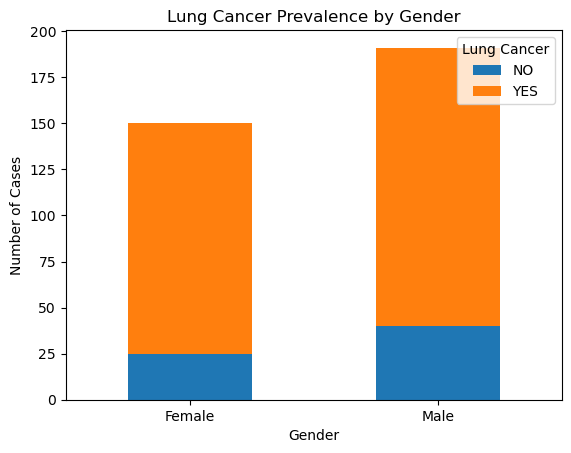

In [13]:
# Group data by gender and count the number of lung cancer cases
gender_lung_cancer_counts = data.groupby(['GENDER', 'LUNG_CANCER']).size().unstack(fill_value=0)

# Create a bar chart
ax = gender_lung_cancer_counts.plot(kind='bar', stacked=True, rot=0)

# Add labels and a legend
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.legend(title='Lung Cancer', loc='upper right')

# Set the x-axis labels to "Female" and "Male"
ax.set_xticklabels(['Female', 'Male'])

# Set the title
plt.title('Lung Cancer Prevalence by Gender')

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

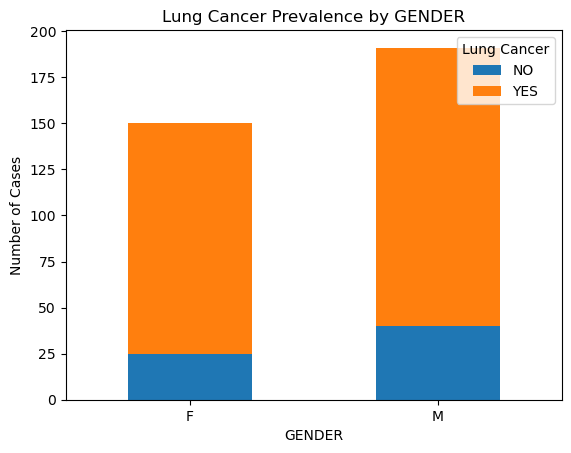

<Figure size 800x600 with 0 Axes>

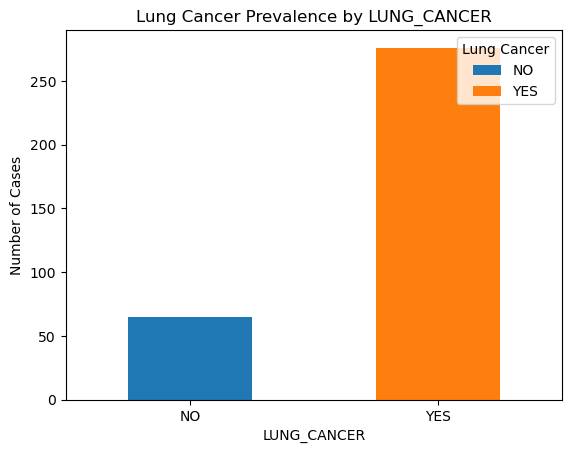

In [14]:
# Get a list of categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Create bar charts for each categorical column vs. Lung Cancer
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    counts = data.groupby([col, 'LUNG_CANCER']).size().unstack(fill_value=0)
    counts.plot(kind='bar', stacked=True, rot=0)
    plt.xlabel(col)
    plt.ylabel('Number of Cases')
    plt.legend(title='Lung Cancer', loc='upper right')
    plt.title(f'Lung Cancer Prevalence by {col}')
    plt.show()

# Dataset Preprocessing Part

In [15]:
import pickle

encoder = LabelEncoder()
scaler = StandardScaler()

# Encoding
# Encode the 'LUNG_CANCER' column by transforming 'YES' and 'NO' to numerical values
data['LUNG_CANCER'] = encoder.fit_transform(data['LUNG_CANCER'])

# Encode the 'GENDER' column by transforming 'F' and 'M' to numerical values
data['GENDER'] = encoder.fit_transform(data['GENDER'])

# Scaling
data['AGE'] = scaler.fit_transform(data[['AGE']])

scalar_data = {
    'mean': scaler.mean_,
    'scale': scaler.scale_
}

with open('scalar_data.pkl', 'wb') as scalar_file:
    pickle.dump(scalar_data, scalar_file)



In [16]:
# List of columns to transform
columns_to_transform = [col for col in data.columns if col not in ['AGE', 'GENDER', 'LUNG_CANCER']]

# Function to convert 2 to 1 and keep 1 as 1
def transform_values(x):
    return 1 if x == 2 else 0

# Apply the transformation to selected columns
data[columns_to_transform] = data[columns_to_transform].applymap(transform_values)

In [17]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0.683102,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,1.040149,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,-0.030993,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,0.254645,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,0.254645,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,1,-2.601734,0,0,0,0,0,0,0,0,0,0,0,0,0,0
337,1,-2.744553,0,0,0,0,0,0,0,0,0,0,0,0,0,0
338,1,-2.673143,0,0,0,0,0,0,0,0,0,0,0,0,0,0
339,1,-2.673143,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
X = data.drop(columns=['LUNG_CANCER'])

y = data['LUNG_CANCER']

In [19]:
X, y = RandomOverSampler().fit_resample(X,y)

<Axes: >

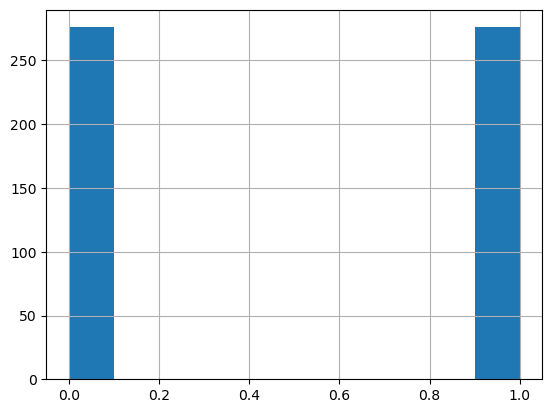

In [20]:
y.hist()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (414, 15)
Test shape: (138, 15)


In [22]:
X_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
159,1,0.611692,0,0,1,1,1,0,0,0,1,0,0,0,0
207,1,0.254645,1,0,0,1,0,0,0,0,0,1,1,0,0
215,0,0.183235,0,0,0,0,1,1,0,0,0,0,1,0,0
53,1,-0.745088,1,0,0,1,1,1,1,1,1,1,1,1,1
74,1,0.111826,1,0,0,0,0,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1,-0.316631,1,0,0,0,0,1,1,0,0,0,1,0,1
167,1,0.183235,0,0,0,0,1,0,1,0,1,1,1,1,1
482,0,0.825921,1,0,0,0,1,1,0,0,0,0,1,0,0
272,1,0.326054,1,0,0,0,0,0,1,1,1,1,0,0,1


In [23]:
y_train

159    0
207    0
215    0
53     1
74     1
      ..
494    0
167    1
482    0
272    0
300    1
Name: LUNG_CANCER, Length: 414, dtype: int64

In [24]:
X_test

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
22,0,-2.744553,1,0,0,0,1,1,1,0,0,0,1,0,0
164,0,1.111559,0,1,0,1,1,1,1,0,1,1,0,0,0
351,1,-0.030993,0,0,0,1,0,1,0,1,0,0,1,0,1
19,0,0.111826,0,0,0,0,1,1,0,0,0,0,1,0,0
532,1,0.611692,1,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,1,-0.245221,1,1,1,0,0,0,0,0,0,0,1,1,0
476,1,-2.744553,0,0,0,1,0,0,0,0,0,0,0,0,0
334,1,-2.744553,0,0,1,0,0,1,0,0,0,0,0,0,1
174,1,0.897330,0,1,0,1,0,1,1,1,1,1,1,0,1


In [25]:
y_test

22     0
164    1
351    0
19     0
532    0
      ..
446    0
476    0
334    0
174    1
135    1
Name: LUNG_CANCER, Length: 138, dtype: int64

# Making The Model

Classifier: Random Forest
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        76
           1       1.00      0.92      0.96        62

    accuracy                           0.96       138
   macro avg       0.97      0.96      0.96       138
weighted avg       0.97      0.96      0.96       138



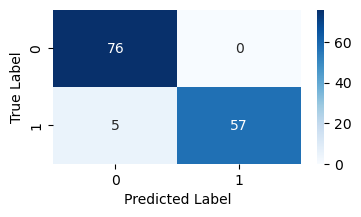



Classifier: SVM
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        76
           1       0.88      0.85      0.87        62

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138



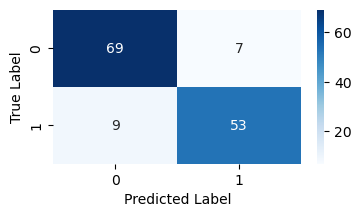



Classifier: AdaBoost
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        76
           1       0.84      0.85      0.85        62

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138



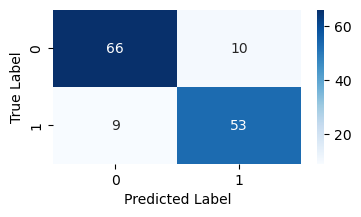



Classifier: KNN
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        76
           1       0.96      0.81      0.88        62

    accuracy                           0.90       138
   macro avg       0.91      0.89      0.90       138
weighted avg       0.91      0.90      0.90       138



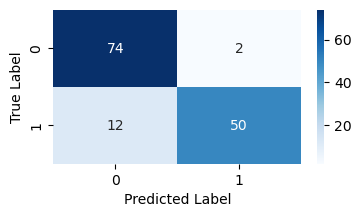

In [26]:
# Define the classifiers
classifiers = [
    ('Random Forest', RandomForestClassifier(max_depth=15)),
    ('SVM', SVC(kernel='linear', probability=True)),
    ('AdaBoost', AdaBoostClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]

# Fit each classifier and calculate precision, recall, accuracy, and store confusion matrix and classification report
results = []

for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results.append({'Classifier': name, 'Classification Report': report, 'Confusion Matrix': conf_matrix})

# Display the results and visualize confusion matrices
for result in results:
    print(f"Classifier: {result['Classifier']}")
    print(result['Classification Report'])
    
    # Visualize the confusion matrix
    plt.figure(figsize=(4, 2))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print("\n")


# Hyperparameter Tuning For Random Forest

In [27]:
random_forest_classifier = classifiers[0][1]  # This accesses the Random Forest classifier
# Get hyperparameters
rf_params = random_forest_classifier.get_params()

# Convert to DataFrame for better visualization, with parameters as rows
rf_params_df = pd.DataFrame(list(rf_params.items()), columns=['Parameter', 'Value'])

# Display the DataFrame
rf_params_df

,Parameter,Value
0,bootstrap,True
1,ccp_alpha,0.0
2,class_weight,None
3,criterion,gini
4,max_depth,15
5,max_features,sqrt
6,max_leaf_nodes,None
7,max_samples,None
8,min_impurity_decrease,0.0
9,min_samples_leaf,1


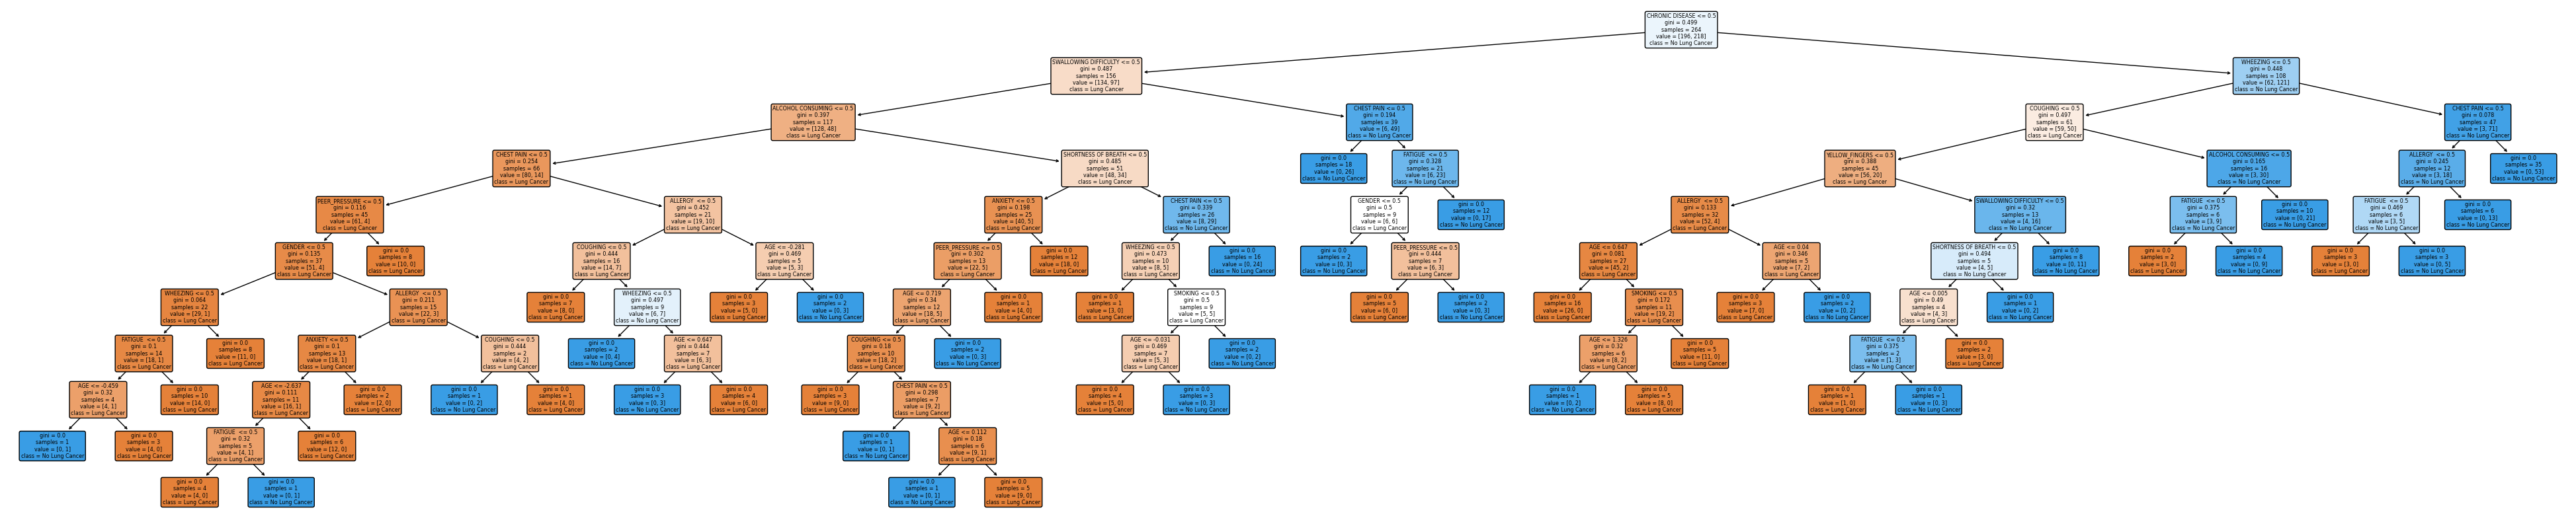

In [28]:
from sklearn.tree import plot_tree
# Select one tree from the forest
tree = random_forest_classifier.estimators_[0]

# Visualize the tree
plt.figure(figsize=(50,10))
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=['Lung Cancer', 'No Lung Cancer'], rounded=True)
plt.show()

# Stacking

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
stacking_classifier = StackingClassifier(
    classifiers=[clf for _, clf in classifiers],
    meta_classifier=LogisticRegression(),
    use_probas=True,       # Use predicted probabilities instead of class labels for meta-classifier
    use_features_in_secondary=True  # Include original features in the secondary meta-classifier
)

NameError: name 'StackingClassifier' is not defined

In [ ]:
# Fit the stacking classifier
stacking_classifier.fit(X_train, y_train)

In [ ]:
# Predictions on the test set
y_pred_stacking = stacking_classifier.predict(X_test)

In [ ]:
report_stacking = classification_report(y_test, y_pred_stacking)
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

stacking_result = {'Classifier': 'Stacking Classifier', 'Classification Report': report_stacking, 'Confusion Matrix': conf_matrix_stacking}

# Display the results and visualize the confusion matrix for the stacking model
print(f"Classifier: {stacking_result['Classifier']}")
print(stacking_result['Classification Report'])

# Visualize the confusion matrix for the stacking model
plt.figure(figsize=(4, 2))
sns.heatmap(stacking_result['Confusion Matrix'], annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("\n")


In [ ]:
y_pred_stacking

In [ ]:
y_test

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your training and testing sets

# Train individual models
random_forest = RandomForestClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
svm_classifier = SVC(kernel='linear', random_state=42)

random_forest.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

# Obtain predictions
rf_predictions = random_forest.predict(X_test)
adaboost_predictions = adaboost.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)

# Create an ensemble dataset
ensemble_data = np.column_stack((rf_predictions, adaboost_predictions, svm_predictions))

# Train XGBoost as the gradient boosting ensemble
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(ensemble_data, y_test)

# Evaluate the ensemble model
ensemble_predictions = xgb_classifier.predict(ensemble_data)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print(f"Ensemble Accuracy: {ensemble_accuracy}")


In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

# Assuming X_train, X_test, y_train, y_test are your training and testing sets

# Train individual models
random_forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()
svm_classifier = SVC(kernel='linear')
knn_classifier = KNeighborsClassifier()

random_forest.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)

# Obtain predictions
rf_predictions = random_forest.predict(X_test)
adaboost_predictions = adaboost.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)

# Create an ensemble dataset
ensemble_data = np.column_stack((rf_predictions, adaboost_predictions, svm_predictions, knn_predictions))

# Train XGBoost as the gradient boosting ensemble
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(ensemble_data, y_test)

# Evaluate the ensemble model
ensemble_predictions = xgb_classifier.predict(ensemble_data)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_predictions)

print(f"Ensemble Accuracy: {ensemble_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

with open('random_forest.pkl', 'wb') as model_file:
    pickle.dump(random_forest, model_file)
    
with open('adaboost.pkl', 'wb') as model_file:
    pickle.dump(adaboost, model_file)
    
with open('svm.pkl', 'wb') as model_file:
    pickle.dump(svm_classifier, model_file)
    
with open('knn.pkl', 'wb') as model_file:
    pickle.dump(knn_classifier, model_file)
    
with open('xgboost.pkl', 'wb') as model_file:
    pickle.dump(xgb_classifier, model_file)


In [ ]:
report_xg_boost = classification_report(y_test, ensemble_predictions)
conf_mat = confusion_matrix(y_test, ensemble_predictions)

xg_res = {
    'Classifier': 'XG Boost', 
    'Classification Report': report_xg_boost, 
    'Confusion Matrix': conf_mat
}
     
print(f"Classifier: {xg_res['Classifier']}")
print(xg_res['Classification Report'])

plt.figure(figsize=(4, 2))
sns.heatmap(xg_res['Confusion Matrix'], annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("\n")


In [ ]:
# import numpy as np
# import xgboost as xgb
# from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix


# # Obtain predictions
# rf_predictions = random_forest.predict(X_test)
# adaboost_predictions = adaboost.predict(X_test)
# svm_predictions = svm_classifier.predict(X_test)
# knn_predictions = knn_classifier.predict(X_test)

# # Create an ensemble dataset
# ensemble_data = np.column_stack((rf_predictions, adaboost_predictions, svm_predictions, knn_predictions))

# # Train XGBoost as the gradient boosting ensemble
# xgb_classifier = xgb.XGBClassifier()
# xgb_classifier.fit(ensemble_data, y_test)

# # Evaluate the ensemble model
# ensemble_predictions = xgb_classifier.predict(ensemble_data)
# ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)